# Superstore Sales Analysis

This notebook provides an exploratory data analysis (EDA) of the *Sample Superstore* dataset.  
The goal is to understand sales performance, profitability, customer behavior, and operational factors such as shipping time.  

Throughout the analysis, we will:
- Clean and preprocess the dataset  
- Generate new features  
- Identify key insights about profit, sales, discounts, products, and regions  
- Visualize trends using Matplotlib  

**Import Libraries**

In [21]:
### Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

## Loading the Dataset

In [22]:
df = pd.read_csv("../data/Sample - Superstore.csv", encoding='latin1')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Converting Date Columns

In [23]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

## Descriptive Statistics

In [25]:
df["Sales"].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [26]:
df["Profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

## Checking for Large Negative Profits

In [27]:
df[df['Profit'] < -1000].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
1199,1200,CA-2016-130946,2016-04-08,2016-04-12,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
1803,1804,CA-2017-158379,2017-09-22,2017-09-26,Second Class,JA-15970,Joseph Airdo,Consumer,United States,Philadelphia,...,19134,East,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4663.736,7,0.2,-1049.3406


## Feature Engineering
We create new useful fields:
- Shipping Days (delivery duration)
- Unit Price per item
- Year and Month extracted from order dates

In [28]:
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Unit Price'] = df['Sales'] / df['Quantity']
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [29]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Days    0
Unit Price       0
Year             0
Month            0
dtype: int64

## Sorting the Dataset

In [30]:
df.sort_values("Order Date", inplace=True)

## Top Worst Profit Orders

In [31]:
df.nsmallest(5, "Profit")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,Unit Price,Year,Month
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,7,899.997,2016,11
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,0,1999.995,2017,11
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,4,272.198,2014,7
3011,3012,CA-2017-134845,2017-04-17,2017-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800,6,509.997,2017,4
4991,4992,US-2017-122714,2017-12-07,2017-12-13,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,6,377.998,2017,12


## Top-Selling Products

In [32]:
top_products = (
    df.groupby("Product Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


## Profit by Category

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


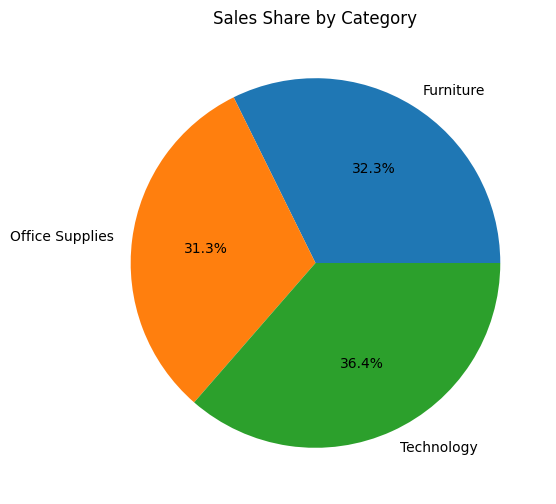

In [34]:
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print(profit_by_category)

df.groupby("Category")["Sales"].sum().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales Share by Category")
plt.ylabel("")
plt.show()

## Least Profitable Sub-Categories

In [35]:
worst_subcats = df.groupby("Sub-Category")["Profit"].sum().sort_values().head(10)
print(worst_subcats)

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64


## Top States by Sales

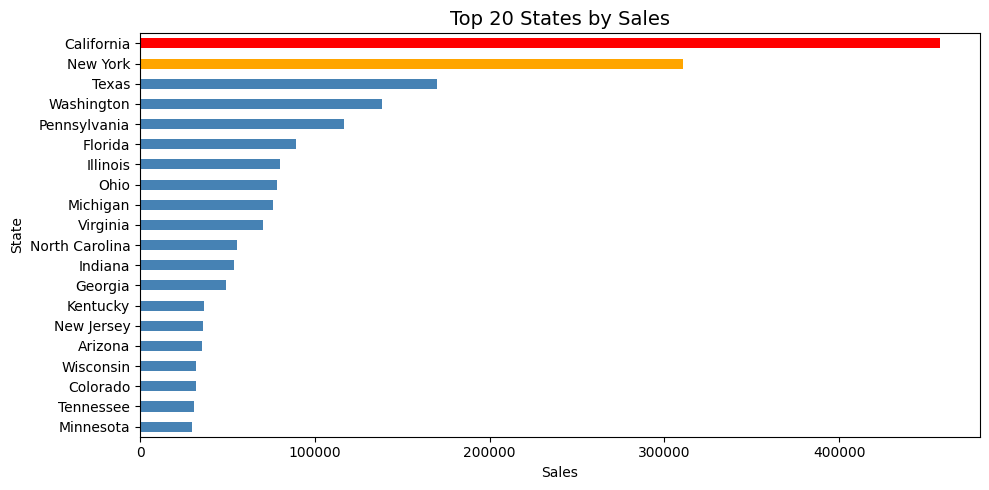

In [50]:
sales_by_state = (
    df.groupby("State")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

top20_states = sales_by_state.head(20)

colors = ["red", "orange"] + ["steelblue"] * (len(top20_states) - 2)

plt.figure(figsize=(10, 5))
top20_states.plot(kind="barh", color=colors)

plt.title("Top 20 States by Sales", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("State")

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

## Top Cities by Sales

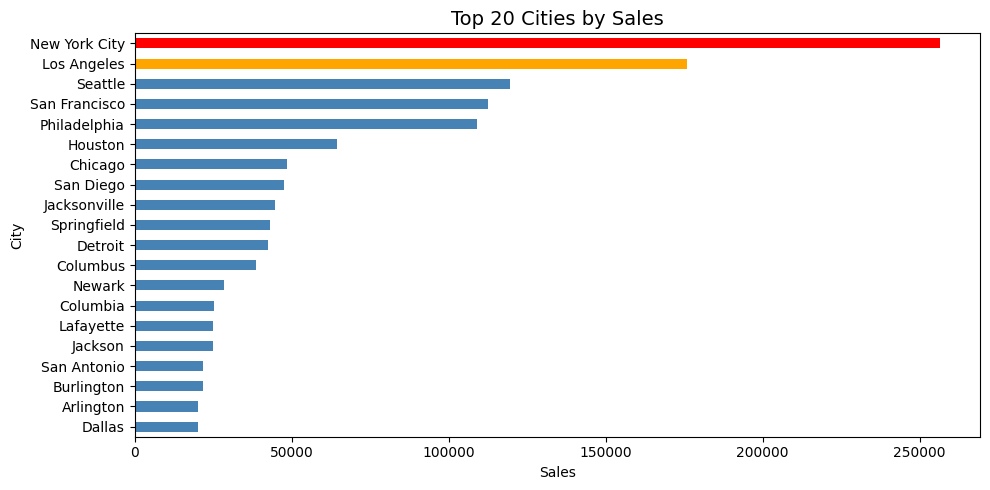

In [51]:
sales_by_city = (
    df.groupby("City")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

top20 = sales_by_city.head(20)

colors = ["red", "orange"] + ["steelblue"] * (len(top20) - 2)

plt.figure(figsize=(10, 5))
top20.plot(kind="barh", color=colors)

plt.title("Top 20 Cities by Sales", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("City")

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


## Discount Impact on Profit

In [52]:
discount_profit = df.groupby("Discount")["Profit"].mean().sort_index()
print(discount_profit)

Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: Profit, dtype: float64


## Shipping Time vs Profit

In [53]:
shipping_profit = df.groupby("Shipping Days")["Profit"].mean()
print(shipping_profit)

Shipping Days
0    29.645411
1    20.436929
2    39.818676
3    26.742208
4    25.643394
5    27.078471
6    27.660821
7    32.740494
Name: Profit, dtype: float64


## Yearly Sales

In [54]:
sales_by_year = df.groupby("Year")["Sales"].sum()
print(sales_by_year)

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


## Monthly Sales

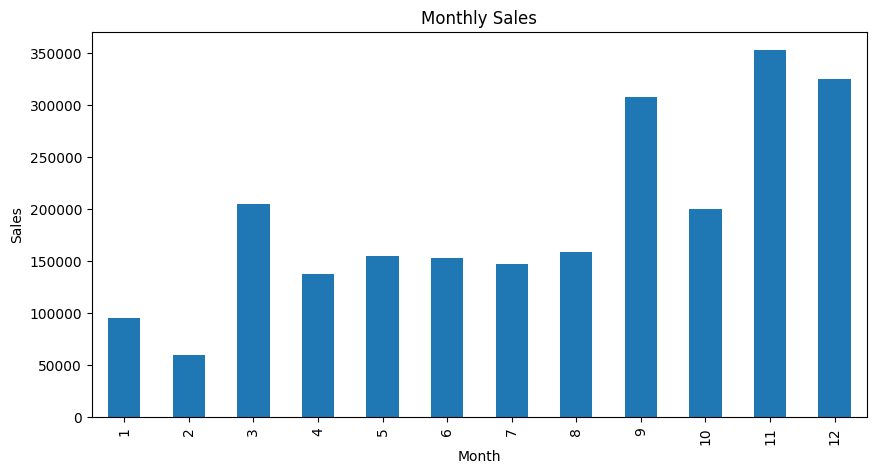

In [55]:
monthly_sales = df.groupby("Month")["Sales"].sum()

df.groupby("Month")["Sales"].sum().plot(kind="bar", figsize=(10,5))
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

## Visualize Profit by Category

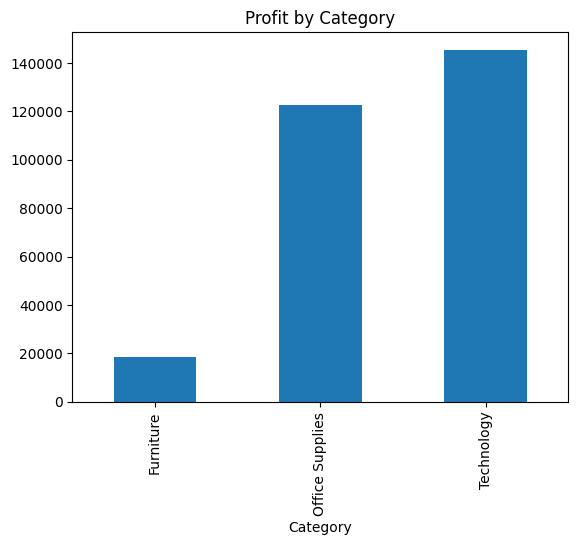

In [56]:
df.groupby("Category")["Profit"].sum().plot(kind="bar")
plt.title("Profit by Category")
plt.show()

## Visualize Shipping Impact on Profit

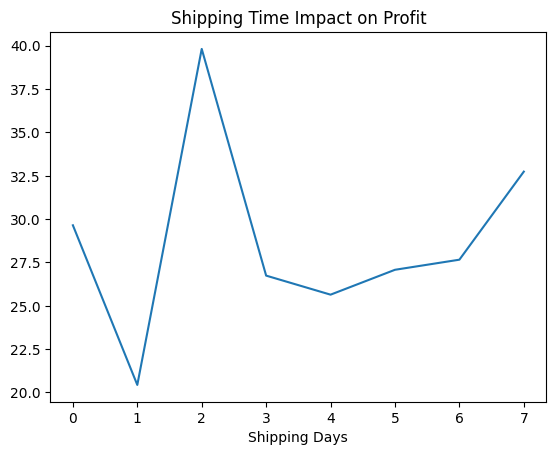

In [57]:
df.groupby("Shipping Days")["Profit"].mean().plot(kind="line")
plt.title("Shipping Time Impact on Profit")
plt.show()

📌 Summary & Key Insights

In this analysis, we explored the Superstore dataset and performed data cleaning, feature engineering, and exploratory data analysis. By examining sales, profit, and operational variables, several important insights emerged:

- Sales and profit distribution vary widely across states and cities, with a small group of locations contributing disproportionately to total revenue.

- High-profit categories such as Technology dominate overall profitability, while categories like Furniture often generate lower margins.

- Some sub-categories consistently underperform, suggesting potential areas for cost reduction or strategy revision.

- Shipping Days show a noticeable relationship with profitability, indicating that operational efficiency can directly impact financial outcomes.

- Strong seasonal patterns appear in both monthly sales and yearly growth trends.

- The Pareto-like behavior (small % of products or regions produce most revenue) is clearly visible, helping businesses prioritize marketing or inventory decisions.

Overall, this notebook provides a foundational exploratory analysis. Future improvements may include deeper statistical tests, forecasting models, or machine learning approaches to better understand customer behavior and optimize business decisions.